In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pylira import Dataset

# Basic test

* 50 data points

* $x \sim \mathcal{N}(0, 1^2)$

* $y|x \sim \mathcal{N}(1 + x, 0.25^2)$

* $x, y | X, Y \sim \mathcal{N}(\{X, Y\}, \{0.1^2, 0.1^2\})$

In [3]:
np.random.seed(123)
n = 50
alpha, beta, sigma = 1.0, 1.0, 0.25

x = np.random.normal(0.0, 1.0, n)
y = np.random.normal(alpha + beta * x, sigma)

x_err = np.ones(n) * 0.1
y_err = np.ones(n) * 0.1
corr = np.ones(n) * 0.0

x_obs = x  # np.random.normal(x, x_err)
y_obs = y  # np.random.normal(y, y_err)
ds = Dataset(x_obs, y_obs, x_err, y_err, corr=corr)

In [4]:
bces = ds.fit_bces()
chains = ds.fit_lira(1, 1e4, lira_args={"sigma.YIZ.0": "dunif(0.0, 1.0)"})

/Users/fkeruzore/.miniconda3/envs/scaling/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
R[write to console]: Loading required package: lira

R[write to console]: Loading required package: coda

R[write to console]: Loading required package: rjags

R[write to console]: Linked to JAGS 4.3.1

R[write to console]: Loaded modules: basemod,bugs



BCES: beta=0.988, alpha=1.01, s=0.353
[1] Running: nsteps=10000, nmix=1, sigma.YIZ.0=dunif(0.0, 1.0)


R[write to console]: module mix loaded



  |**************************************************| 100%

Iterations = 2502:12501
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

               Mean      SD  Naive SE Time-series SE
alpha.YIZ   1.01193 0.04005 0.0004005      0.0006391
beta.YIZ    0.98694 0.03261 0.0003261      0.0004988
mu.Z.0      0.01309 0.17344 0.0017344      0.0022562
sigma.YIZ.0 0.23826 0.03368 0.0003368      0.0006864
sigma.Z.0   1.21588 0.12804 0.0012804      0.0013095

2. Quantiles for each variable:

               2.5%     25%     50%    75%  97.5%
alpha.YIZ    0.9335  0.9850 1.01150 1.0382 1.0914
beta.YIZ     0.9243  0.9647 0.98693 1.0084 1.0515
mu.Z.0      -0.3327 -0.1049 0.01495 0.1283 0.3547
sigma.YIZ.0  0.1781  0.2149 0.23585 0.2593 0.3120
sigma.Z.0    0.9989  1.1259 1.20366 1.2941 1.4998



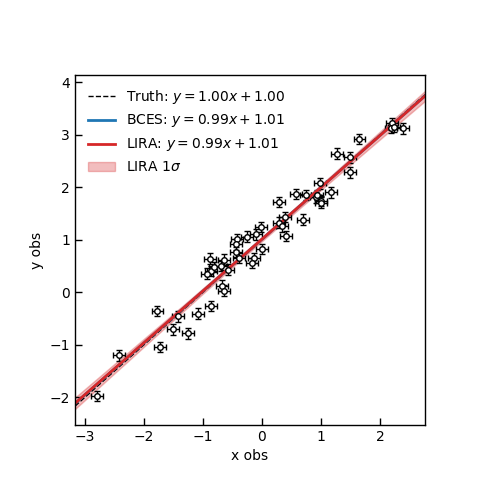

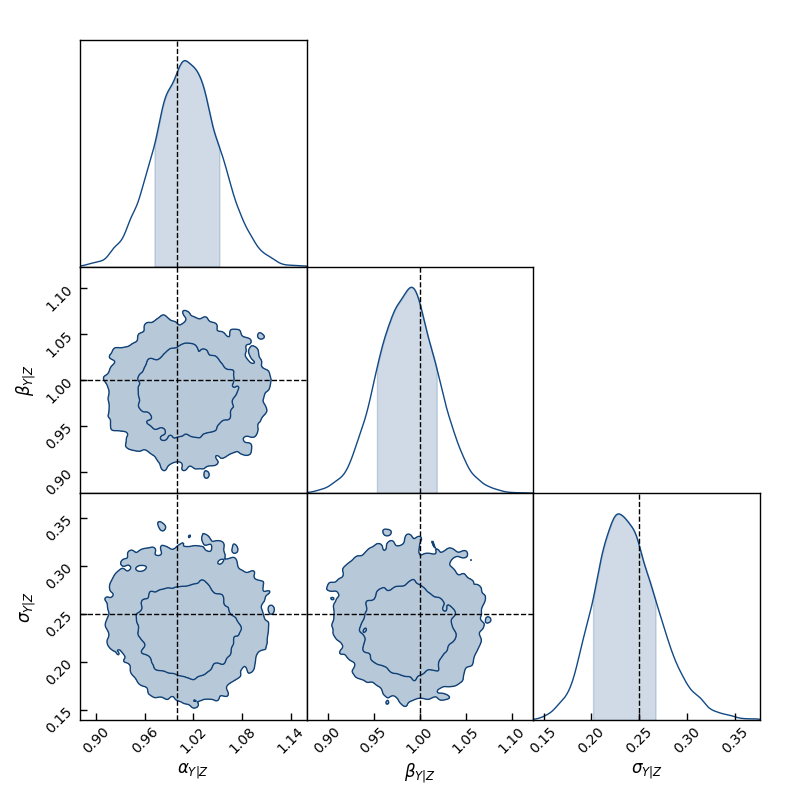

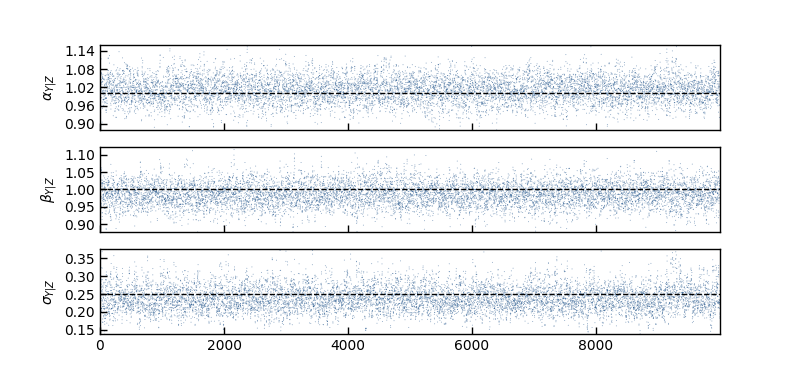

In [5]:
fig, ax = ds.plot_data(style="errb")
ds.plot_alphabeta(ax, alpha, beta, label="Truth", addeq=True, ls="--", color="k")
ds.plot_alphabeta(ax, bces[0], bces[1], label="BCES", addeq=True, ls="-", color="tab:blue", lw=2)
ds.plot_alphabeta(ax, np.median(chains["alpha.YIZ"]), np.median(chains["beta.YIZ"]), label="LIRA", addeq=True, color="tab:red", lw=2)
ds.plot_alphabeta(ax, chains["alpha.YIZ"], chains["beta.YIZ"], label="LIRA $1\sigma$", color="tab:red")
ax.legend(frameon=False)
figs = ds.plot_lira_results(nmix=1, truth=[alpha, beta, sigma])

# Correlated uncertainties

* 50 data points

* $x \sim \mathcal{N}(0, 1^2)$

* $y|x \sim \mathcal{N}(1 + x, 0.25^2)$

* $x, y | X, Y \sim \mathcal{N}(\{X, Y\}, \{0.1^2, 0.1^2, 0.1 \times 0.1 \times 0.5\})$

In [6]:
np.random.seed(123)
n = 50
alpha, beta, sigma = 1.0, 1.0, 0.25

x = np.random.normal(0.0, 1.0, n)
y = np.random.normal(alpha + beta * x, sigma)

x_err = np.ones(n) * 0.1
y_err = np.ones(n) * 0.1
corr = np.ones(n) * 0.5

x_obs = x  # np.random.normal(x, x_err)
y_obs = y  # np.random.normal(y, y_err)
ds = Dataset(x_obs, y_obs, x_err, y_err, corr=corr)

In [7]:
bces = ds.fit_bces()
chains = ds.fit_lira(1, 1e4, lira_args={"sigma.YIZ.0": "dunif(0.0, 1.0)"})

BCES: beta=0.984, alpha=1.01, s=0.366
[1] Running: nsteps=10000, nmix=1, sigma.YIZ.0=dunif(0.0, 1.0)
  |************                                      |  24%

/Users/fkeruzore/.miniconda3/envs/scaling/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


  |**************************************************| 100%

Iterations = 2502:12501
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

               Mean      SD  Naive SE Time-series SE
alpha.YIZ   1.01035 0.03858 0.0003858      0.0005526
beta.YIZ    0.98327 0.03307 0.0003307      0.0004658
mu.Z.0      0.01567 0.16976 0.0016976      0.0024526
sigma.YIZ.0 0.25836 0.03101 0.0003101      0.0005015
sigma.Z.0   1.21572 0.12607 0.0012607      0.0013188

2. Quantiles for each variable:

               2.5%      25%     50%    75%  97.5%
alpha.YIZ    0.9355  0.98464 1.00997 1.0354 1.0888
beta.YIZ     0.9170  0.96123 0.98323 1.0054 1.0476
mu.Z.0      -0.3223 -0.09505 0.01498 0.1296 0.3516
sigma.YIZ.0  0.2047  0.23637 0.25612 0.2776 0.3248
sigma.Z.0    1.0005  1.12675 1.20508 1.2909 1.4982



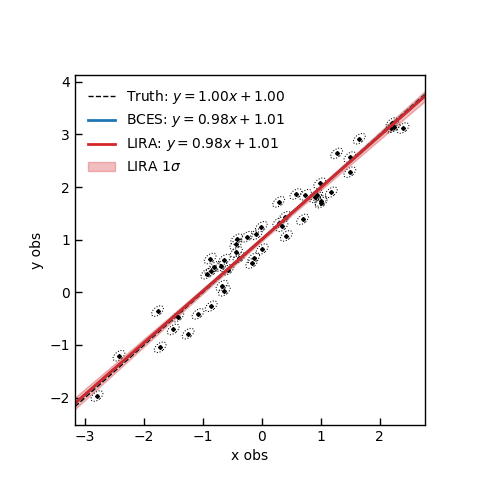

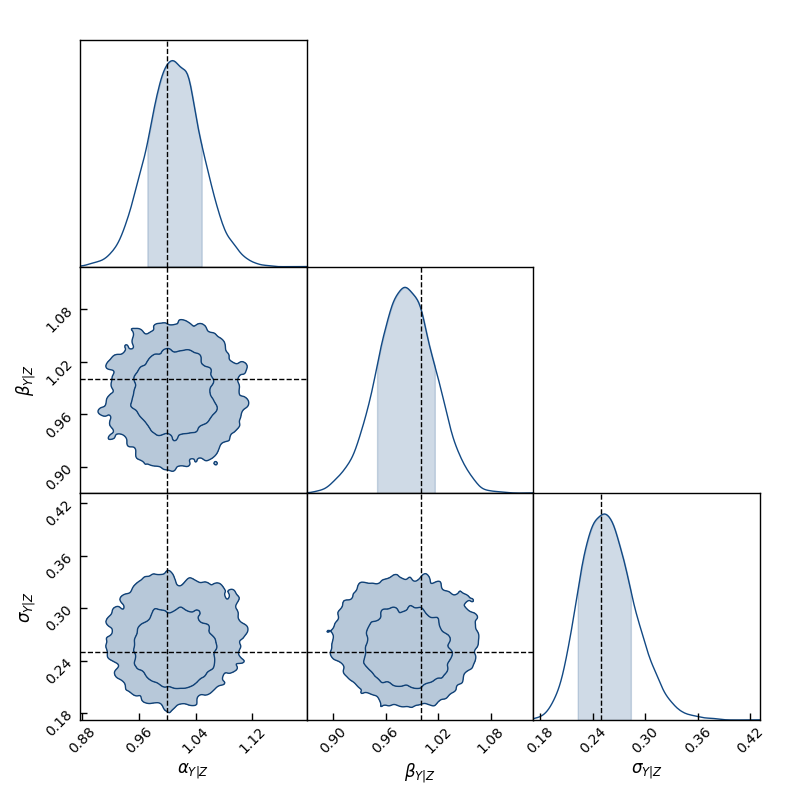

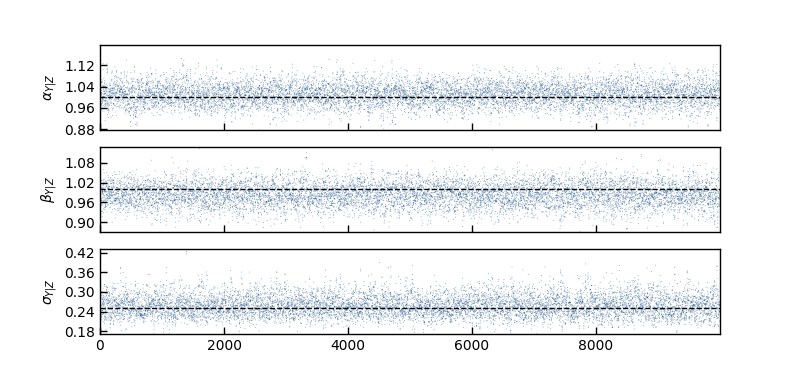

In [8]:
fig, ax = ds.plot_data(style="ellipse")
ds.plot_alphabeta(ax, alpha, beta, label="Truth", addeq=True, ls="--", color="k")
ds.plot_alphabeta(ax, bces[0], bces[1], label="BCES", addeq=True, ls="-", color="tab:blue", lw=2)
ds.plot_alphabeta(ax, np.median(chains["alpha.YIZ"]), np.median(chains["beta.YIZ"]), label="LIRA", addeq=True, color="tab:red", lw=2)
ds.plot_alphabeta(ax, chains["alpha.YIZ"], chains["beta.YIZ"], label="LIRA $1\sigma$", color="tab:red")
ax.legend(frameon=False)
figs = ds.plot_lira_results(nmix=1, truth=[alpha, beta, sigma])

# Truncated distribution

* 50 data points

* $x \sim \mathcal{N}(0, 1^2)$

* $y|x \sim \mathcal{N}(1 + x, 0.25^2)$

* $x, y | X, Y \sim \mathcal{N}(\{X, Y\}, \{0.1^2, 0.1^2, 0.1 \times 0.1 \times 0.5\}) \times \mathcal{U}(1, 10^4)$

In [9]:
np.random.seed(123)
n = 100
alpha, beta, sigma = 1.0, 1.0, 0.25

x = np.random.normal(0.0, 1.0, n)
y = np.random.normal(alpha + beta * x, sigma)
msk = y > 1.0

x_err = np.ones(n) * 0.1
y_err = np.ones(n) * 0.1
corr = np.ones(n) * 0.5

x_obs = x  # np.random.normal(x, x_err)
y_obs = y  # np.random.normal(y, y_err)
ds = Dataset(x_obs[msk], y_obs[msk], x_err[msk], y_err[msk], corr=corr[msk], y_threshold=1.0)

In [10]:
bces = ds.fit_bces()
chains = ds.fit_lira(1, 1e4, lira_args={"sigma.YIZ.0": "dunif(0.0, 1.0)"})

BCES: beta=0.925, alpha=1.1, s=0.321
[1] Running: nsteps=10000, nmix=1, sigma.YIZ.0=dunif(0.0, 1.0)
[1] "Threshold keywords recognized:  y.threshold,"


/Users/fkeruzore/.miniconda3/envs/scaling/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


  |**************************************************| 100%

Iterations = 2502:12501
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

              Mean      SD  Naive SE Time-series SE
alpha.YIZ   1.0240 0.09703 0.0009703      0.0042517
beta.YIZ    0.9749 0.07621 0.0007621      0.0032665
mu.Z.0      1.0261 0.09356 0.0009356      0.0012324
sigma.YIZ.0 0.2446 0.03389 0.0003389      0.0006980
sigma.Z.0   0.6318 0.06942 0.0006942      0.0007886

2. Quantiles for each variable:

              2.5%    25%    50%    75%  97.5%
alpha.YIZ   0.8148 0.9650 1.0282 1.0890 1.2027
beta.YIZ    0.8313 0.9236 0.9723 1.0230 1.1388
mu.Z.0      0.8390 0.9656 1.0263 1.0885 1.2122
sigma.YIZ.0 0.1881 0.2207 0.2414 0.2649 0.3207
sigma.Z.0   0.5127 0.5827 0.6264 0.6735 0.7844



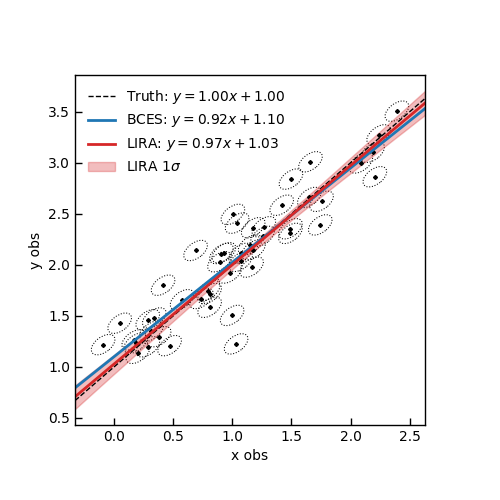

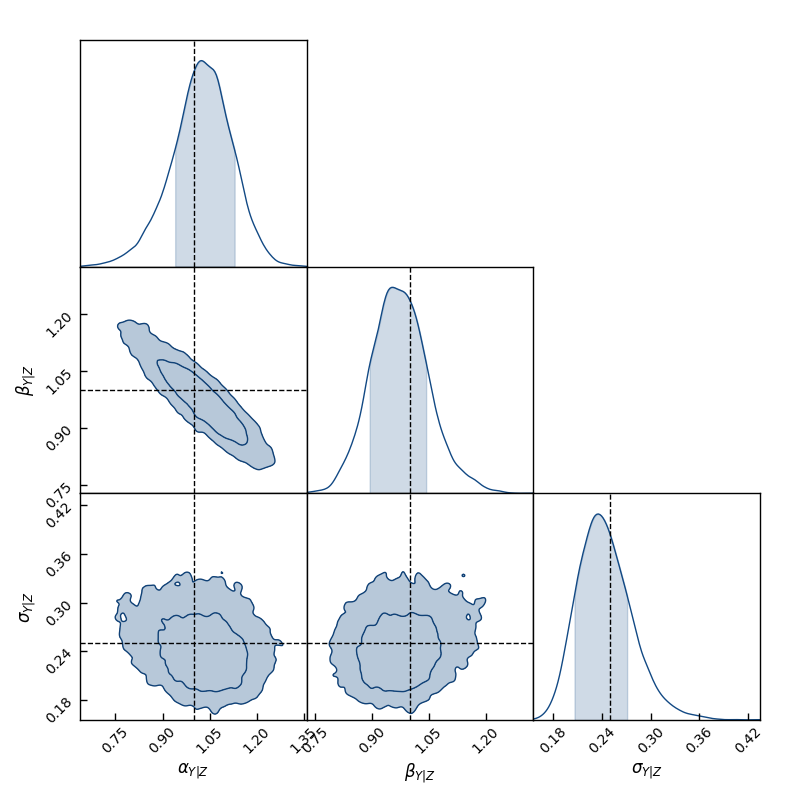

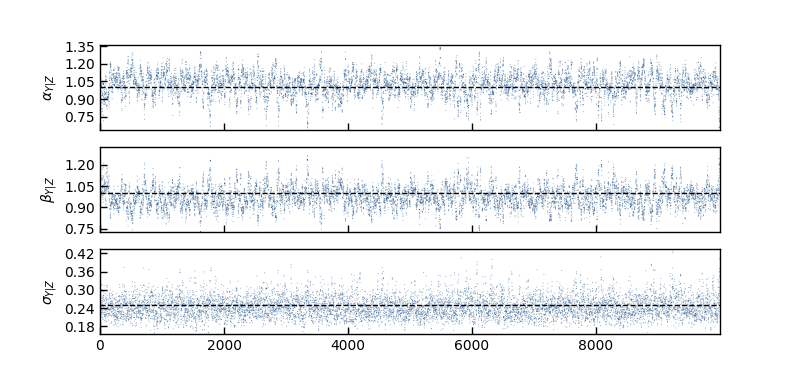

In [11]:
fig, ax = ds.plot_data(style="ellipse")
ds.plot_alphabeta(ax, alpha, beta, label="Truth", addeq=True, ls="--", color="k")
ds.plot_alphabeta(ax, bces[0], bces[1], label="BCES", addeq=True, ls="-", color="tab:blue", lw=2)
ds.plot_alphabeta(ax, np.median(chains["alpha.YIZ"]), np.median(chains["beta.YIZ"]), label="LIRA", addeq=True, color="tab:red", lw=2)
ds.plot_alphabeta(ax, chains["alpha.YIZ"], chains["beta.YIZ"], label="LIRA $1\sigma$", color="tab:red")
ax.legend(frameon=False)
figs = ds.plot_lira_results(nmix=1, truth=[alpha, beta, sigma])